# Investigating Coupled Pendula using Python
## Joel Hochstetter

The simple pendula is one of the most studied systems in all Physics. But what happens if you connect two or more separate pendula together such as the system shown below? This leads to some interesting Physics which are highly sensitive to initial conditions of the system.

![alt text](https://raw.githubusercontent.com/joelhochstetter/Coupled-Pendula-Assignment/master/pendula.JPG "CP Diagram")

For the system of pendula studied here the pendula that are $L$ long with masses $m_1$ and $m_2$ respectively. At a distance of $l$ from their pivot point an ideal spring of spring constant $k$ is attached. It is assumed that the rod is massless and hence, the moments of inertia of the bobs about their respective pivot points are $m_1L^2$ and $m_2L^2$ respectively. The equations of motion describing such a system are:

$$\begin{align}
m_1L^2\ddot{\phi_1}+m_1gL\phi_1=-kl^2(\phi_1-\phi_2)\\
m_2L^2\ddot{\phi_2}+m_2gL\phi_2=+kl^2(\phi_1-\phi_2)
\end{align}$$

An analytical solution is reasonably straightforward to obtain in the simple case that $m_1 = m_2$ however with increasing complications such as addition of additional pendula or additional coupling springs the equations can become nasty. 

Any resulting solution, should be able to be expressed as a linear combination of the "normal modes" of the system (for example see Chapter 11 John Taylors's Classical Mechanics, 2005) which correspond to stationary states of fixed frequency. Hence, any resulting solution should be periodic (provided we do not add in any non-conservative forces into the system, such as air resistance). The theory states that the number of normal modes will no larger than number of degrees of freedom for the system. So an n-coupled pendula system where the pivots points are fixed in space (and hence will have no translational degrees of freedom) will have n-normal modes. So once we have found the n normal modes we know that no more will exist.

For a two pendulum system we expect two normal modes correspond to both pendula in phase and both pendula out of phase but this will be verified below.

The local maxima of thefourier transform which is defined below allows us to obtain the frequency of the normal modes of the system.
$$\begin{align}
F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i\omega t} dt
\end{align}$$
where $\omega = 2\pi f$. Numerically I will use numpy's "Fast Fourier Transform" to obtain the frequencies of constituent waves in a given set-up.

In order for us to understand the implication of these equations on the motion of coupled pendula the following factors will be investigated:
1. For 2 coupled pendula
    * Finding the normal modes of the system by their starting condition
    * Investigating the effect of changing coupling length on normal modes of in phase, out of phase and beating pendula and comparison to experimental results.
    * A visualisation of a beating pendula
    * Investigating the effect of changing the ratio of intial angles
    
2. For 3 coupled pendula
    * Finding the normal modes of the system by their starting condition
    * Showing another starting condition leads to a superposition of the starting positions.
    
To begin in phase $\phi_1(0)=\phi_2(0)$, out of phase $\phi_1(0)=-\phi_2(0)$ initial conditions will be solved for and $\phi_1(0)=\phi_max$ and $\phi_2(0)=0$. Code has been written to calculate the normal modes of each system. Below we also have an animation of each of these cases so it can be seen how the system appears physically.

In the lab $k\approx3$N/m, $L=1$m. and $m_1=m_2=1$kg so this will be where we start. 

Note for these set-ups time used to calculate the fourier transform will be $5000.0$s however for display shorter times will be displayed for clarity. Also for fourier transforms only the location directly around the peaks will be displayed.

Since a small angle approximation was used in the derivation a maximum starting angle has been chosen to be $5^o$ for the investigation.

Note also that $k$ and $l^2$ appear together so varying either will have the same effect. We will vary $l$ in this investigation.

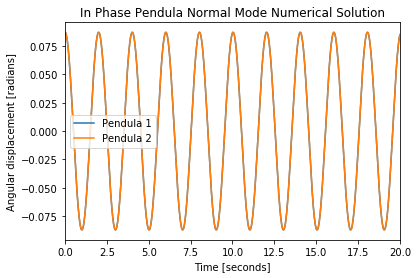

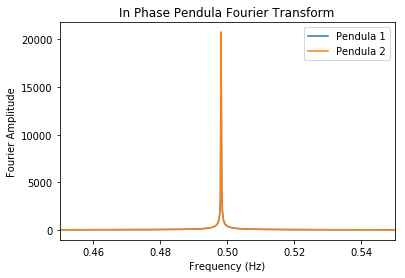

Peaks of fourier transform of pendula 1 are [0.4981990036]
Peaks of fourier transform of pendula 2 are [0.4981990036]
The normal modes are at [0.4981990036]Hz


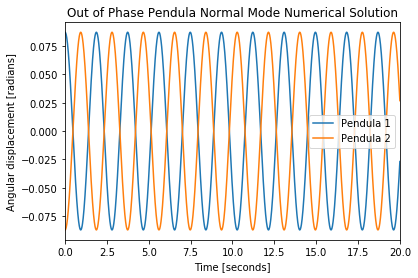

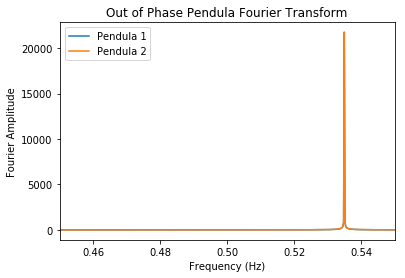

Peaks of fourier transform of pendula 1 are [0.53499893]
Peaks of fourier transform of pendula 2 are [0.53499893]
The normal modes are at [0.53499893]Hz


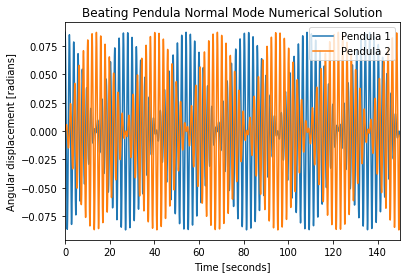

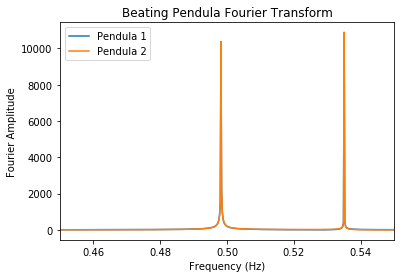

Peaks of fourier transform of pendula 1 are [0.4981990036, 0.53499893]
Peaks of fourier transform of pendula 2 are [0.4981990036, 0.53499893]
The normal modes are at [0.4981990036, 0.53499893]Hz


In [1]:
#Numerical solution
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

def pendula(y, t, k, l, m1, m2, L, g):
    phi1, phi2, phi1dot, phi2dot = y
    phi1ddot = -(k * (l ** 2)/m/(L ** 2)+g/L)*phi1 + k*(l ** 2)/m/(L ** 2) * phi2
    phi2ddot = -(k* (l ** 2)/m/(L ** 2)+g/L)*phi2+ (l ** 2)/m/(L ** 2) * (k*phi1)
    return [phi1dot, phi2dot,phi1ddot, phi2ddot]

def getNormalModes(t,y): 
    #has a threshold normal modes of 1/10 of absolute maxima of fft
    FreqAmp = np.abs(np.fft.fft(y))
    Freq = np.fft.fftfreq(len(y), t[1] - t[0])
    FreqAmp = FreqAmp[:len(FreqAmp)/2]
    Freq = Freq[:len(Freq)/2]
    threshAmp = max(FreqAmp) / 5
    NormalModes = []
    for i in range (1,len(FreqAmp)-1):
        if ((FreqAmp[i]>FreqAmp[i-1]) & (FreqAmp[i]>FreqAmp[i+1]) & (FreqAmp[i]>=threshAmp)):
            NormalModes.append(Freq[i])
    return [Freq, FreqAmp, NormalModes]

initialTime = 0.0
finalTime = 5000.0
stepSize = 0.01
t = np.linspace(initialTime, finalTime, num=int(finalTime/stepSize))
                               
k = 3.0
l = 0.5
m = 1.0
L = 1.0
g = 9.8

IPsolution = odeint(pendula, [math.radians(5.0), math.radians(5.0), 0.0, 0.0], t, args=(k, l, m, m, L, g))
plt.figure()
plt.xlabel("Time [seconds]")
plt.ylabel("Angular displacement [radians]")
plt.plot(t, IPsolution[:,0])
plt.plot(t, IPsolution[:,1])
plt.title('In Phase Pendula Normal Mode Numerical Solution')
plt.legend(('Pendula 1', 'Pendula 2'))
plt.xlim(0,20)
plt.show()

ft1 = getNormalModes(t, IPsolution[:,0])
ft2 = getNormalModes(t, IPsolution[:,1])
plt.figure()
plt.ylabel("Fourier Amplitude")
plt.xlabel("Frequency (Hz)")
plt.plot(ft1[0], ft1[1])
plt.plot(ft2[0], ft2[1])
plt.legend(('Pendula 1', 'Pendula 2'))
plt.title('In Phase Pendula Fourier Transform')
plt.xlim(0.45,0.55)
plt.show()
print 'Peaks of fourier transform of pendula 1 are ' + str(ft1[2])
print 'Peaks of fourier transform of pendula 2 are ' + str(ft2[2])
print 'The normal modes are at ' + str(ft1[2]) + 'Hz'


OPsolution = odeint(pendula, [math.radians(5.0), math.radians(-5.0), 0.0, 0.0], t, args=(k, l, m, m, L, g))
plt.figure()
plt.xlabel("Time [seconds]")
plt.ylabel("Angular displacement [radians]")
plt.plot(t, OPsolution[:,0])
plt.plot(t, OPsolution[:,1])
plt.xlim(0,20)
plt.legend(('Pendula 1', 'Pendula 2'))
plt.title('Out of Phase Pendula Normal Mode Numerical Solution')
plt.show()

ft1 = getNormalModes(t, OPsolution[:,0])
ft2 = getNormalModes(t, OPsolution[:,1])
plt.figure()
plt.ylabel("Fourier Amplitude")
plt.xlabel("Frequency (Hz)")
plt.plot(ft1[0], ft1[1])
plt.plot(ft2[0], ft2[1])
plt.legend(('Pendula 1', 'Pendula 2'))
plt.title('Out of Phase Pendula Fourier Transform')
plt.xlim(0.45,0.55)
plt.show()
print 'Peaks of fourier transform of pendula 1 are ' + str(ft1[2])
print 'Peaks of fourier transform of pendula 2 are ' + str(ft2[2])
print 'The normal modes are at ' + str(ft1[2]) + 'Hz'


Beatsolution = odeint(pendula, [math.radians(5.0), math.radians(0.0), 0.0, 0.0], t, args=(k, l, m, m, L, g))
plt.figure()
plt.xlabel("Time [seconds]")
plt.ylabel("Angular displacement [radians]")
plt.plot(t, Beatsolution[:,0])
plt.plot(t, Beatsolution[:,1])
plt.xlim(0.0,150.0)
plt.legend(('Pendula 1', 'Pendula 2'))
plt.title('Beating Pendula Normal Mode Numerical Solution')
plt.show()

ft1 = getNormalModes(t, Beatsolution[:,0])
ft2 = getNormalModes(t, Beatsolution[:,1])
plt.figure()
plt.ylabel("Fourier Amplitude")
plt.xlabel("Frequency (Hz)")
plt.plot(ft1[0], ft1[1])
plt.plot(ft2[0], ft2[1])
plt.legend(('Pendula 1', 'Pendula 2'))
plt.title('Beating Pendula Fourier Transform')
plt.xlim(0.45,0.55)
plt.show()
print 'Peaks of fourier transform of pendula 1 are ' + str(ft1[2])
print 'Peaks of fourier transform of pendula 2 are ' + str(ft2[2])
print 'The normal modes are at ' + str(ft1[2]) + 'Hz'

So in this case the resonant frequencies for the pendula with initial conditions $\phi_1(0)=\phi_{max}$ and $\phi_2(0)=0$ are the same as the resonant frequencies for the in phase and out of phase oscillations. The in phase and out of phase oscillations are normal modes since the pendula oscillate at a fixed frequency in this state. The beating phenomena occurs since the resonant frequencies of the two normal modes are close.

Here is a visualisation of the 3 set-ups we have looked at so far.

Next we will vary length and compare the resulting frequencies for the in phase, out of phase and beating ($\phi_1(0)=\phi_{max}$ and $\phi_2(0)=0$) case and compare with experimental results.

<IPython.core.display.Javascript object>


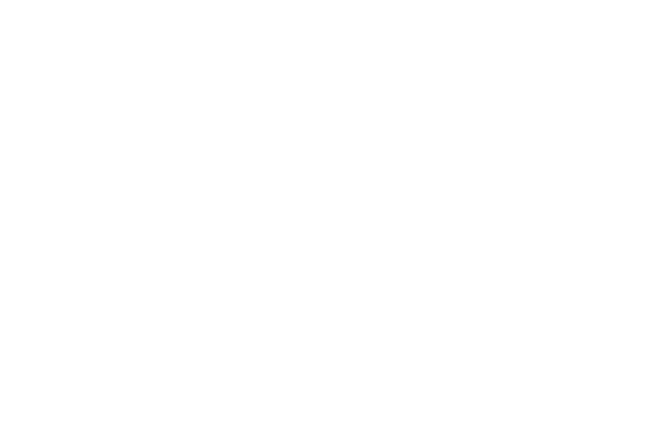

<IPython.core.display.Javascript object>


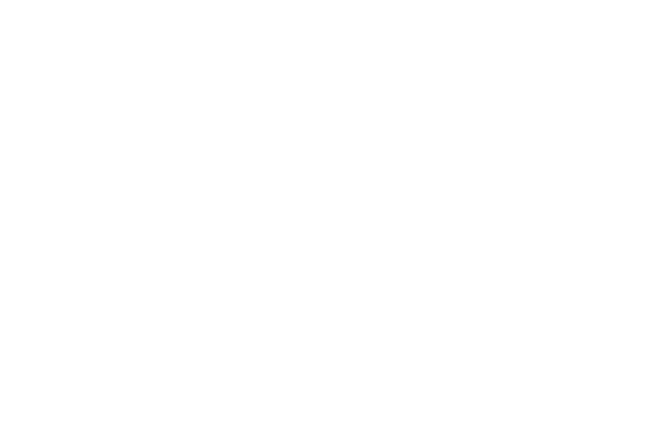

In [82]:
#plotting 2 pendula in phase
%matplotlib notebook
import matplotlib.animation as animation

initialTime = 0.0
finalTime = 20.0
stepSize = 0.03
t = np.linspace(initialTime, finalTime, num=int(finalTime/stepSize))
                               
k = 3.0
l = 0.5
m = 1.0
L = 1.0
g = 9.8

IPAnimate = odeint(pendula, [math.radians(5.0), math.radians(5.0), 0.0, 0.0], t, args=(k, l, m, m, L, g))

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 1), ylim=(-1.5, 0.5))
ax.grid()

line1, = ax.plot([], [], 'o-', lw=2)
line2, = ax.plot([], [], 'o-', lw=2)
line3, = ax.plot([], [], 'g-', lw=2)


def getxy(phi, L): #phi as an array and l as a number
    return [L*np.sin(phi),-L*np.cos(phi)]

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return line1, line2, line3


def animate(i):
    x1, y1 = getxy(IPAnimate[:,0],1)
    x2, y2 = getxy(IPAnimate[:,1],1)
    thisx = [0.25, x1[i]+0.25]
    thisy = [0, y1[i]]
    othx = [-0.25,x2[i]-0.25]
    othy = [0,y2[i]]
    springx = [x1[i]*l/L+0.25,x2[i]*l/L-0.25]
    springy = [y1[i]*l/L,y2[i]*l/L]
    line1.set_data(thisx, thisy)
    line2.set_data(othx, othy)
    line3.set_data(springx, springy)
    return line1, line2, line3

ani = animation.FuncAnimation(fig, animate, frames=len(IPAnimate[:,0]), interval=30)
plt.show()
ani

<IPython.core.display.Javascript object>


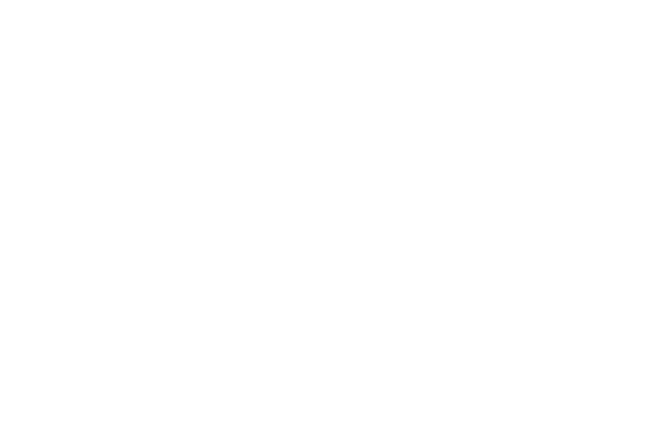

<IPython.core.display.Javascript object>


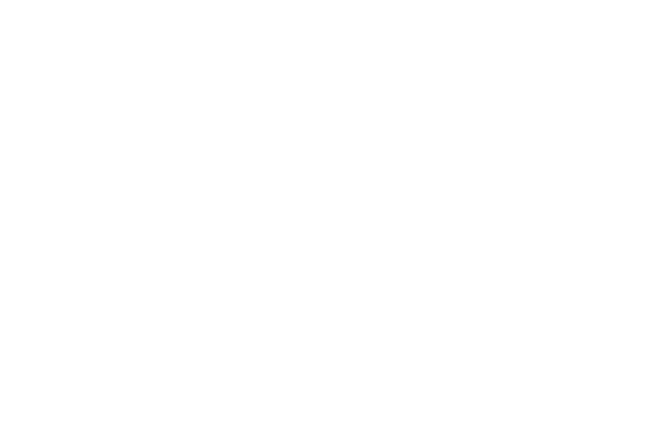

In [84]:
#plotting 2 pendula out of phase

%matplotlib notebook
import matplotlib.animation as animation

initialTime = 0.0
finalTime = 20.0
stepSize = 0.03
t = np.linspace(initialTime, finalTime, num=int(finalTime/stepSize))
                               
k = 3.0
l = 0.5
m = 1.0
L = 1.0
g = 9.8

OPAnimate = odeint(pendula, [math.radians(5.0), math.radians(-5.0), 0.0, 0.0], t, args=(k, l, m, m, L, g))

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 1), ylim=(-1.5, 0.5))
ax.grid()

line1, = ax.plot([], [], 'o-', lw=2)
line2, = ax.plot([], [], 'o-', lw=2)
line3, = ax.plot([], [], 'g-', lw=2)


def getxy(phi, L): #phi as an array and l as a number
    return [L*np.sin(phi),-L*np.cos(phi)]

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return line1, line2, line3


def animate(i):
    x1, y1 = getxy(OPAnimate[:,0],1)
    x2, y2 = getxy(OPAnimate[:,1],1)
    thisx = [0.25, x1[i]+0.25]
    thisy = [0, y1[i]]
    othx = [-0.25,x2[i]-0.25]
    othy = [0,y2[i]]
    springx = [x1[i]*l/L+0.25,x2[i]*l/L-0.25]
    springy = [y1[i]*l/L,y2[i]*l/L]
    line1.set_data(thisx, thisy)
    line2.set_data(othx, othy)
    line3.set_data(springx, springy)
    return line1, line2, line3

ani = animation.FuncAnimation(fig, animate, frames=len(OPAnimate[:,0]), interval=30)
plt.show()
ani

<IPython.core.display.Javascript object>


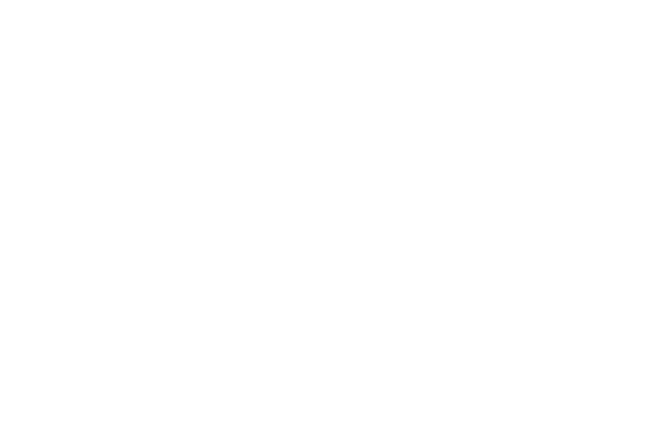

<IPython.core.display.Javascript object>


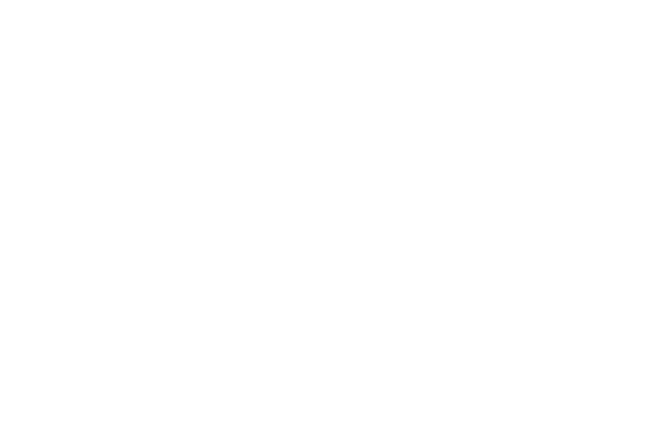

In [85]:
#plotting 2 pendula beating
%matplotlib notebook
import matplotlib.animation as animation

initialTime = 0.0
finalTime = 150.0
stepSize = 0.03
t = np.linspace(initialTime, finalTime, num=int(finalTime/stepSize))
                               
k = 3.0
l = 0.5
m = 1.0
L = 1.0
g = 9.8

BeatAnimate = odeint(pendula, [math.radians(5.0), math.radians(0.0), 0.0, 0.0], t, args=(k, l, m, m, L, g))

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 1), ylim=(-1.5, 0.5))
ax.grid()

line1, = ax.plot([], [], 'o-', lw=2)
line2, = ax.plot([], [], 'o-', lw=2)
line3, = ax.plot([], [], 'g-', lw=2)


def getxy(phi, L): #phi as an array and l as a number
    return [L*np.sin(phi),-L*np.cos(phi)]

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return line1, line2, line3


def animate(i):
    x1, y1 = getxy(BeatAnimate[:,0],1)
    x2, y2 = getxy(BeatAnimate[:,1],1)
    thisx = [0.25, x1[i]+0.25]
    thisy = [0, y1[i]]
    othx = [-0.25,x2[i]-0.25]
    othy = [0,y2[i]]
    springx = [x1[i]*l/L+0.25,x2[i]*l/L-0.25]
    springy = [y1[i]*l/L,y2[i]*l/L]
    line1.set_data(thisx, thisy)
    line2.set_data(othx, othy)
    line3.set_data(springx, springy)
    return line1, line2, line3

ani = animation.FuncAnimation(fig, animate, frames=len(BeatAnimate[:,0]), interval=30)
plt.show()
ani

In [8]:
%matplotlib inline
#Computes experimental results into an list 
import urllib2

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

def getDataFromURL(urlname):
    time = []
    V1 = []
    V2 = []
    for line in urllib2.urlopen(urlname):
        row=line.split()
        if row != []:
            if is_number(row[0]):
                time.append(float(row[0]))
                V1.append(float(row[1]))
                V2.append(float(row[3]))
    return [V1, V2, time]

def getNMFromExperimentalData():
    expList = dict()
    for mottype in ["IP", "op", "beat"]:
        llist = []
        nm = []
        nmOther = []
        for i in range(1,6):
            urlname = "https://raw.githubusercontent.com/joelhochstetter/Coupled-Pendula-Assignment/master/" + mottype + str(i*10) + "cm"
            mydata = getDataFromURL(urlname)
            llist.append(i*0.10)
            ft = getNormalModes(t, mydata[0])
            ft[2] = [i*2 for i in ft[2]]
            nmForEach = ft[2]
            if (len(nmForEach) >= 1):
                nm.append(nmForEach[0])
                if (len(nmForEach) >= 2):
                    nmOther.append(nmForEach[1])
                else:
                    nmOther.append(0.0)
            else:
                print 'Error: incorrect number of Normal Modes'
        expList[mottype] = [llist, nm, nmOther]
    return expList

expResults = getNMFromExperimentalData()

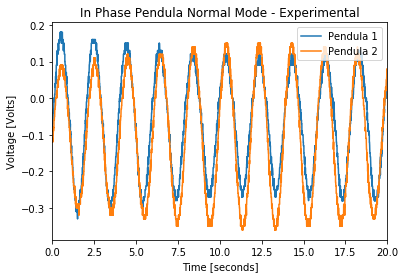

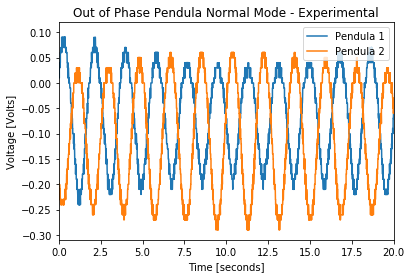

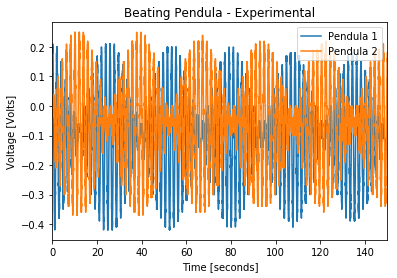

In [10]:
#Plots Experimental 
%matplotlib inline    

IPexp = getDataFromURL("https://raw.githubusercontent.com/joelhochstetter/Coupled-Pendula-Assignment/master/IP50cm")
plt.figure()
plt.xlabel("Time [seconds]")
plt.ylabel("Voltage [Volts]")
plt.plot(IPexp[2], IPexp[0])
plt.plot(IPexp[2], IPexp[1])
plt.title('In Phase Pendula Normal Mode - Experimental')
plt.legend(('Pendula 1', 'Pendula 2'))
plt.xlim(0,20)
plt.show()

OPexp = getDataFromURL("https://raw.githubusercontent.com/joelhochstetter/Coupled-Pendula-Assignment/master/op50cm")
plt.figure()
plt.xlabel("Time [seconds]")
plt.ylabel("Voltage [Volts]")
plt.plot(OPexp[2], OPexp[0])
plt.plot(OPexp[2], OPexp[1])
plt.title('Out of Phase Pendula Normal Mode - Experimental')
plt.legend(('Pendula 1', 'Pendula 2'))
plt.xlim(0,20)
plt.show()

Bexp = getDataFromURL("https://raw.githubusercontent.com/joelhochstetter/Coupled-Pendula-Assignment/master/beat50cm")
plt.figure()
plt.xlabel("Time [seconds]")
plt.ylabel("Voltage [Volts]")
plt.plot(Bexp[2], Bexp[0])
plt.plot(Bexp[2], Bexp[1])
plt.title('Beating Pendula - Experimental')
plt.legend(('Pendula 1', 'Pendula 2'))
plt.xlim(0,150)
plt.show()

The nature of the solution for the experimental results agree with the nature of the solution for the computational results as well. The in phase and out of phase components are normal modes for both. The beating both has a rapidly oscillating angle enveloped by an enveloping function controlling amplitude.

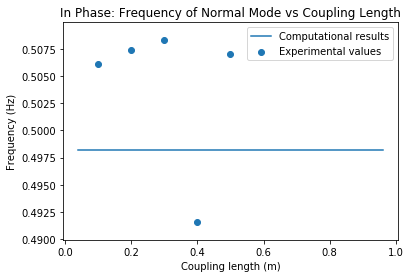

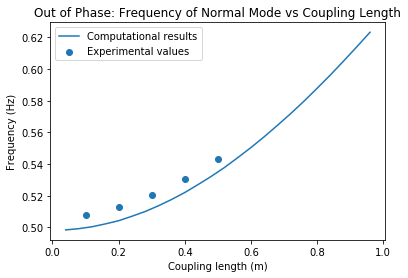

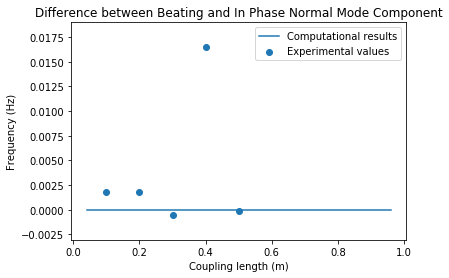

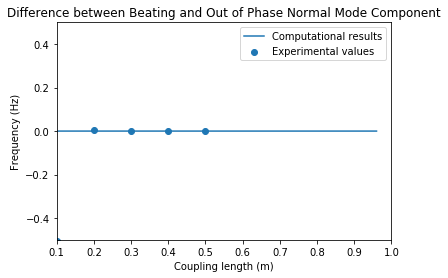

In [66]:
#Varying coupling length
%matplotlib inline

def lvsnm(phi1, phi2, t):
    llist = []
    nm = []
    nmOther = []
    for i in range(1,25):
        llist.append(float(i*0.04))
        mySol = odeint(pendula, [math.radians(phi1), math.radians(phi2), 0.0, 0.0], t, args=(k, float(i)*0.04, m, m, L, g))
        nmForEach = []
        for el in getNormalModes(t, mySol[:,0])[2]:
            nmForEach.append(el)
        if (len(nmForEach) == 1) or (len(nmForEach) == 2):
            nm.append(nmForEach[0])
            if (len(nmForEach) == 2):
                nmOther.append(nmForEach[1])
            else:
                nmOther.append(0.0)
        else:
            print 'Error: incorrect number of Normal Modes'
    return [llist, nm, nmOther]

#In Phase
ipVaryl = lvsnm(5.0, 5.0, t)        
plt.figure()
plt.title('In Phase: Frequency of Normal Mode vs Coupling Length')
plt.xlabel('Coupling length (m)')
plt.ylabel('Frequency (Hz)')
plt.plot(ipVaryl[0], ipVaryl[1])
plt.scatter(expResults["IP"][0], expResults["IP"][1])
plt.legend(('Computational results', 'Experimental values'))
plt.show()


#Out of Phase
opVaryl = lvsnm(5.0, -5.0, t)        
plt.figure()
plt.title('Out of Phase: Frequency of Normal Mode vs Coupling Length')
plt.xlabel('Coupling length (m)')
plt.ylabel('Frequency (Hz)')
plt.plot(opVaryl[0], opVaryl[1])
plt.scatter(expResults["op"][0], expResults["op"][1])
plt.legend(('Computational results', 'Experimental values'))
plt.show()

#Beating
beatVaryl = lvsnm(5.0, 0.0, t)        
plt.figure()
plt.xlabel('Coupling length (m)')
plt.ylabel('Frequency (Hz)')
plt.plot(beatVaryl[0], np.array(beatVaryl[1])-np.array(ipVaryl[1]))
plt.scatter(expResults["beat"][0], np.array(expResults["beat"][1])-np.array(expResults["IP"][1]))
plt.legend(('Computational results', 'Experimental values'))
plt.title('Difference between Beating and In Phase Normal Mode Component')
plt.xlabel('Coupling length (m)')
plt.ylabel('Frequency (Hz)')
plt.show()
plt.figure()
plt.plot(beatVaryl[0], np.array(beatVaryl[2])-np.array(opVaryl[1]))
plt.scatter(expResults["beat"][0], np.array(expResults["beat"][2])-np.array(expResults["op"][1]))
plt.legend(('Computational results', 'Experimental values'))
plt.xlim(0.1,1.0)
plt.ylim(-0.5,0.5)
plt.title('Difference between Beating and Out of Phase Normal Mode Component')
plt.xlabel('Coupling length (m)')
plt.ylabel('Frequency (Hz)')
plt.show()

Hence, the frequencies that made up the beating component were identical to the frequencies in the in phase and out of phase component for each coupling length. Agreeing with the fact that any general solution is a superposition of the normal modes. Increasing the coupling length does not change the in phase normal mode component. 
These results agree with our experimental results as the trends are identical with a slight frequency shift for the in phase and out of phase components. For both the "beating" pendulum is made up of a superposition of in phase and out of phase normal modes since the difference in frequencies between the normal mode frequency obtained with pendula starting in that normal mode and the frequency obtained by a fourier transform of the beating pendula is 0. Differences in experimental results likely occur due to the approximation that the rods are massless and the bob has moment of inertia of a point mass. 


So far, only 3 initial conditions have been considered. Now we will consider some cases where the ratio of starting angles are varied.

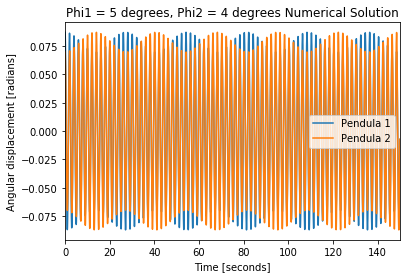

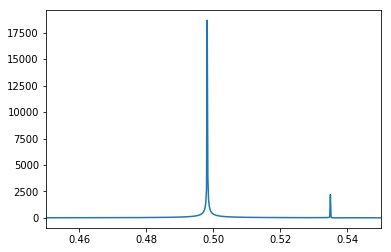

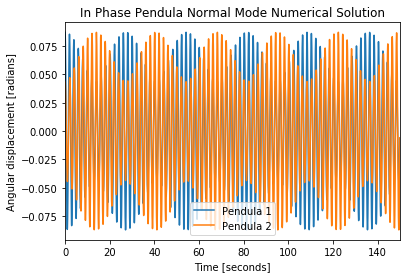

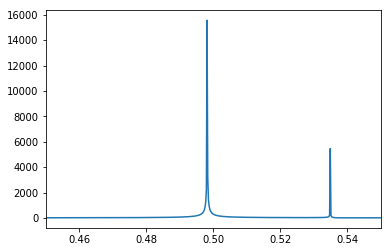

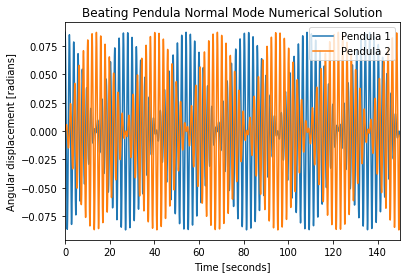

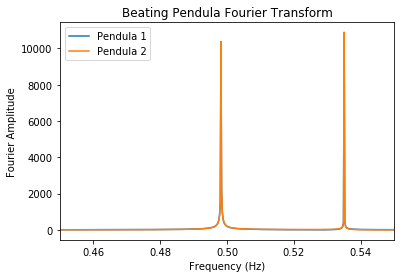

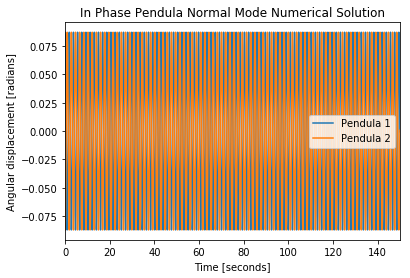

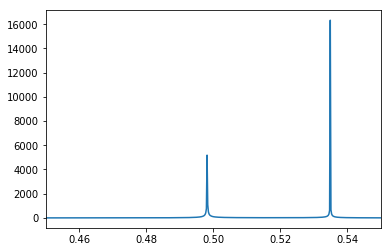

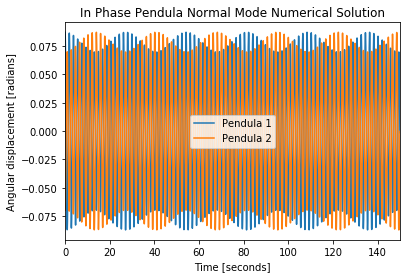

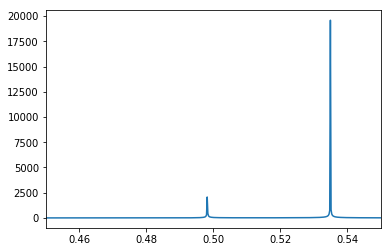

In [69]:
#Varying ratio of the angles
ratio5to4 = odeint(pendula, [math.radians(5.0), math.radians(4.0), 0.0, 0.0], t, args=(k, 0.5 ,m, m, L, g))
plt.figure()
plt.xlabel("Time [seconds]")
plt.ylabel("Angular displacement [radians]")
plt.plot(t, ratio5to4[:,0])
plt.plot(t, ratio5to4[:,1])
plt.title('Phi1 = 5 degrees, Phi2 = 4 degrees Numerical Solution')
plt.xlim(0.0,150.0)
plt.legend(('Pendula 1', 'Pendula 2'))
plt.show()
plt.figure()
ft = getNormalModes(t, ratio5to4[:,1])
plt.xlim(0.45,0.55)
plt.plot(ft[0], ft[1])
plt.show()

ratio2to1 = odeint(pendula, [math.radians(5.0), math.radians(2.5), 0.0, 0.0], t, args=(k, 0.5, m, m, L, g))
plt.figure()
plt.xlabel("Time [seconds]")
plt.ylabel("Angular displacement [radians]")
plt.plot(t, ratio2to1[:,0])
plt.plot(t, ratio2to1[:,1])
plt.title('In Phase Pendula Normal Mode Numerical Solution')
plt.legend(('Pendula 1', 'Pendula 2'))
plt.xlim(0.0,150.0)
plt.show()
plt.figure()
ft = getNormalModes(t, ratio2to1[:,1])
plt.xlim(0.45,0.55)
plt.plot(ft[0], ft[1])
plt.show()

Beatsolution = odeint(pendula, [math.radians(5.0), math.radians(0.0), 0.0, 0.0], t, args=(k, l, m, m, L, g))
plt.figure()
plt.xlabel("Time [seconds]")
plt.ylabel("Angular displacement [radians]")
plt.plot(t, Beatsolution[:,0])
plt.plot(t, Beatsolution[:,1])
plt.xlim(0.0,150.0)
plt.legend(('Pendula 1', 'Pendula 2'))
plt.title('Beating Pendula Normal Mode Numerical Solution')
plt.show()

ft1 = getNormalModes(t, Beatsolution[:,0])
ft2 = getNormalModes(t, Beatsolution[:,1])
plt.figure()
plt.ylabel("Fourier Amplitude")
plt.xlabel("Frequency (Hz)")
plt.plot(ft1[0], ft1[1])
plt.plot(ft2[0], ft2[1])
plt.legend(('Pendula 1', 'Pendula 2'))
plt.title('Beating Pendula Fourier Transform')
plt.xlim(0.45,0.55)
plt.show()

ratio2tominus1 = odeint(pendula, [math.radians(5.0), math.radians(-2.5), 0.0, 0.0], t, args=(k, 0.5, m, m, L, g))
plt.figure()
plt.xlabel("Time [seconds]")
plt.ylabel("Angular displacement [radians]")
plt.plot(t, OPsolution[:,0])
plt.plot(t, OPsolution[:,1])
plt.title('In Phase Pendula Normal Mode Numerical Solution')
plt.legend(('Pendula 1', 'Pendula 2'))
plt.xlim(0.0,150.0)
plt.show()
plt.figure()
ft = getNormalModes(t, ratio2tominus1[:,1])
plt.xlim(0.45,0.55)
plt.plot(ft[0], ft[1])
plt.show()

ratio5tominus4 = odeint(pendula, [math.radians(5.0), math.radians(-4.0), 0.0, 0.0], t, args=(k, 0.5, m, m, L, g))
plt.figure()
plt.xlabel("Time [seconds]")
plt.ylabel("Angular displacement [radians]")
plt.plot(t, ratio5tominus4[:,0])
plt.plot(t, ratio5tominus4[:,1])
plt.title('In Phase Pendula Normal Mode Numerical Solution')
plt.legend(('Pendula 1', 'Pendula 2'))
plt.xlim(0.0,150.0)
plt.show()
plt.figure()
ft = getNormalModes(t, ratio5tominus4[:,1])
plt.xlim(0.45,0.55)
plt.plot(ft[0], ft[1])
plt.show()

As seen from the fourier transforms. As the ratio $\phi_2(0)/\phi_1(0)$ approaching approaches 1 the amplitude of the out of phase normal mode component approaches 0, so the in phase wave component dominates. As the ratio $\phi_2(0)/\phi_1(0)$ approaching approaches -1 the amplitude of the out of phase normal mode component approaches 0 so the in phase component dominates. As $\phi_2(0)/\phi_1(0)$ approaches 0 then the "enveloping" function becomes larger and beating is observed.

Now suppose that there are 3 pendula coupled pendula with pendulum 1 attached to pendulum 2 with a spring of spring constant $k_a$ and pendulum 2 attached to pendulum 3 with a spring of spring constant $k_b$. Again noting that $k$ and $l$ always appear together varying means we don't need to worry about setting different coupling lengths between the pendula, as varying $k_a$ and $k_b$ will lead to all the same solutions mathematically.
$$\begin{align}
mL^2\ddot{\phi_1}+mgL\phi_1=-k_al^2(\phi_1-\phi_2)\\
mL^2\ddot{\phi_2}+mgL\phi_2=k_al^2(\phi_1-\phi_2)+k_bl^2(\phi_3-\phi_2)\\
mL^2\ddot{\phi_3}+mgL\phi_3=k_bl^2(\phi_2-\phi_3)
\end{align}$$

By experimenting with different initial conditions it was found that the initial conditions leading to the 3 normal modes were:
1. $\phi_1(0)=\phi_2(0)=\phi_3(0)=\phi_{max}$
2. $\phi_1(0)=-\phi_3(0)=\pm\phi_{max}$ and $\phi_2(0)=0$
3. $\phi_1(0)=\phi_3(0)=\phi_{max}/2$ and $\phi_2(0)=-\phi_{max}$

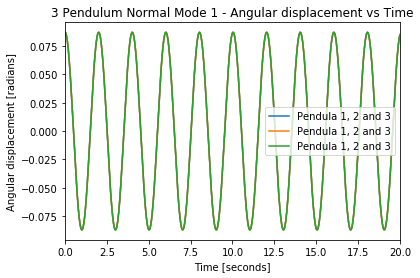

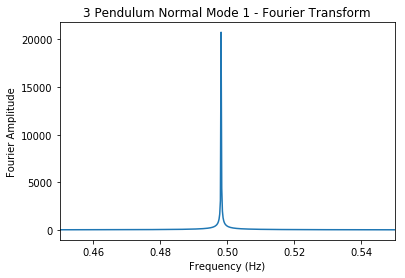

The normal modes are at [0.4981990036]Hz


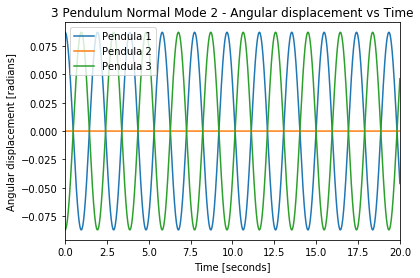

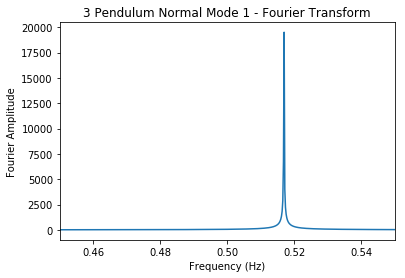

The normal modes are at [0.5169989660000001]Hz


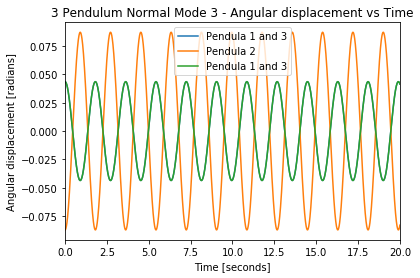

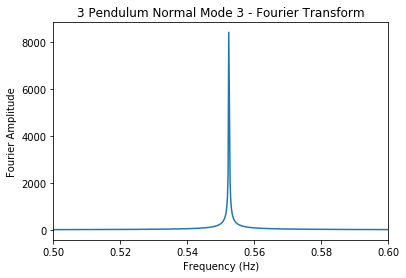

The normal modes are at [0.5523988952000001]Hz


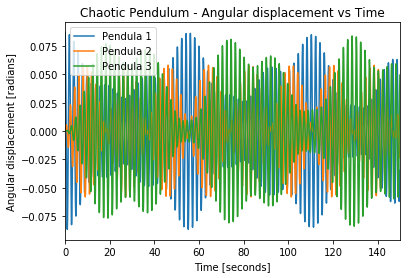

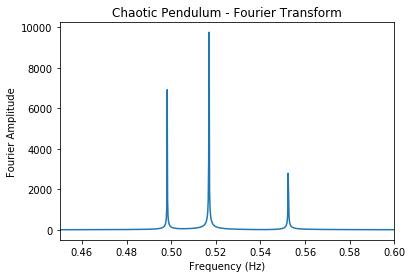

The normal modes are at [0.4981990036, 0.5169989660000001, 0.5523988952000001]Hz


In [49]:
%matplotlib inline
def threependula(y, t, ka, kb, l, m, L, g):
    phi1, phi2, phi3, phi1dot, phi2dot, phi3dot = y
    phi1ddot = -(ka * (l ** 2)/m/(L ** 2)+g/L)*phi1 + k*(l ** 2)/m/(L ** 2) * phi2
    phi2ddot = -((ka+kb)* (l ** 2)/m/(L ** 2)+g/L)*phi2+ (l ** 2)/m/(L ** 2) * (ka*phi1 + kb*phi3)
    phi3ddot = -(kb * (l ** 2)/m/(L ** 2)+g/L)*phi3 + kb*(l ** 2)/m/(L ** 2) * phi2
    return [phi1dot, phi2dot, phi3dot, phi1ddot, phi2ddot, phi3ddot]

t = np.linspace(initialTime, finalTime, num=int(finalTime/stepSize))
                               
k = 3.0
m = 1.0
L = 1.0
g = 9.8

tpnm1 = odeint(threependula, [math.radians(5.0), math.radians(5.0), math.radians(5.0), 0.0, 0.0, 0.0], t, args=(k, k, 0.5, m, L, g))
tpnm2 = odeint(threependula, [math.radians(5.0), math.radians(0.0), math.radians(-5.0), 0.0, 0.0, 0.0], t, args=(k, k, 0.5, m, L, g))
tpnm3 = odeint(threependula, [math.radians(5.0/2), math.radians(-5.0), math.radians(5.0/2), 0.0, 0.0, 0.0], t, args=(k, k, 0.5, m, L, g))
chaos = odeint(threependula, [math.radians(5.0), math.radians(0.0), math.radians(0.0), 0.0, 0.0, 0.0], t, args=(k, k, 0.5, m, L, g))

plt.figure()
plt.xlabel("Time [seconds]")
plt.ylabel("Angular displacement [radians]")
plt.plot(t, tpnm1[:,0])
plt.plot(t, tpnm1[:,1])
plt.plot(t, tpnm1[:,2])
plt.title('3 Pendulum Normal Mode 1 - Angular displacement vs Time')
plt.legend(('Pendula 1, 2 and 3', 'Pendula 1, 2 and 3', 'Pendula 1, 2 and 3'))
plt.xlim(0,20)
plt.show()

ft1 = getNormalModes(t, tpnm1[:,0])
plt.figure()
plt.ylabel("Fourier Amplitude")
plt.xlabel("Frequency (Hz)")
plt.plot(ft1[0], ft1[1])
plt.title('3 Pendulum Normal Mode 1 - Fourier Transform')
plt.xlim(0.45,0.55)
plt.show()
print 'The normal modes are at ' + str(ft1[2]) + 'Hz'

plt.figure()
plt.xlabel("Time [seconds]")
plt.ylabel("Angular displacement [radians]")
plt.plot(t, tpnm2[:,0])
plt.plot(t, tpnm2[:,1])
plt.plot(t, tpnm2[:,2])
plt.title('3 Pendulum Normal Mode 2 - Angular displacement vs Time')
plt.legend(('Pendula 1', 'Pendula 2', 'Pendula 3'))
plt.xlim(0,20)
plt.show()

ft1 = getNormalModes(t, tpnm2[:,0])
plt.figure()
plt.ylabel("Fourier Amplitude")
plt.xlabel("Frequency (Hz)")
plt.plot(ft1[0], ft1[1])
plt.title('3 Pendulum Normal Mode 1 - Fourier Transform')
plt.xlim(0.45,0.55)
plt.show()
print 'The normal modes are at ' + str(ft1[2]) + 'Hz'

plt.figure()
plt.xlabel("Time [seconds]")
plt.ylabel("Angular displacement [radians]")
plt.plot(t, tpnm3[:,0])
plt.plot(t, tpnm3[:,1])
plt.plot(t, tpnm3[:,2])
plt.title('3 Pendulum Normal Mode 3 - Angular displacement vs Time')
plt.legend(('Pendula 1 and 3', 'Pendula 2', 'Pendula 1 and 3'))
plt.xlim(0,20)
plt.show()

ft1 = getNormalModes(t, tpnm3[:,0])
plt.figure()
plt.ylabel("Fourier Amplitude")
plt.xlabel("Frequency (Hz)")
plt.plot(ft1[0], ft1[1])
plt.title('3 Pendulum Normal Mode 3 - Fourier Transform')
plt.xlim(0.5,0.6)
plt.show()
print 'The normal modes are at ' + str(ft1[2]) + 'Hz'

plt.figure()
plt.xlabel("Time [seconds]")
plt.ylabel("Angular displacement [radians]")
plt.plot(t, chaos[:,0])
plt.plot(t, chaos[:,1])
plt.plot(t, chaos[:,2])
plt.title('Chaotic Pendulum - Angular displacement vs Time')
plt.legend(('Pendula 1', 'Pendula 2', 'Pendula 3'))
plt.xlim(0,150)
plt.show()

ft1 = getNormalModes(t, chaos[:,0])
plt.figure()
plt.ylabel("Fourier Amplitude")
plt.xlabel("Frequency (Hz)")
plt.plot(ft1[0], ft1[1])
plt.title('Chaotic Pendulum - Fourier Transform')
plt.xlim(0.45,0.6)
plt.show()
print 'The normal modes are at ' + str(ft1[2]) + 'Hz'

Since these states have one fixed frequency they describe the normal modes.

In [ ]:
#plotting 3 pendula - chaos
%matplotlib notebook
import matplotlib.animation as animation

tripSolution = chaos

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 1), ylim=(-1.5, 0.5))
ax.grid()

pend1, = ax.plot([], [], 'o-', lw=2)
pend2, = ax.plot([], [], 'o-', lw=2)
pend3, = ax.plot([], [], 'o-', lw=2)
springa, = ax.plot([], [], 'g-', lw=2)
springb, = ax.plot([], [], 'b-', lw=2)


def getxy(phi, L): #phi as an array and l as a number
    return [L*np.sin(phi),-L*np.cos(phi)]

def init():
    pend1.set_data([], [])
    pend2.set_data([], [])
    pend3.set_data([], [])
    springa.set_data([], [])
    springb.set_data([], [])
    return pend1, pend2, pend3, springa, springb


def animate(i):
    x1, y1 = getxy(tripSolution[:,0],1)
    x2, y2 = getxy(tripSolution[:,1],1)
    x3, y3 = getxy(tripSolution[:,2],1)
    pend1x = [0.5, x1[i]+0.5]
    pend1y = [0, y1[i]]
    pend2x = [0,x2[i]]
    pend2y = [0,y2[i]]
    pend3x = [-0.5,x3[i]-0.5]
    pend3y = [0,y3[i]]    
    springax = [x1[i]*l/L+0.5,x2[i]*l/L]
    springay = [y1[i]*l/L,y2[i]*l/L]
    springbx = [x2[i]*l/L,x3[i]*l/L-0.5]
    springby = [y2[i]*l/L,y3[i]*l/L]    
    pend1.set_data(pend1x, pend1y)
    pend2.set_data(pend2x, pend2y)
    pend3.set_data(pend3x, pend3y)
    springa.set_data(springax, springay)
    springb.set_data(springbx, springby)
    return pend1, pend2, pend3, springa, springb

ani = animation.FuncAnimation(fig, animate, np.arange(0, len(IPsolution[:,0])), interval=1, blit=True, init_func=init)

initialTime = 0.0
finalTime = 120.0
stepSize = 0.01
t = np.linspace(initialTime, finalTime, num=int(finalTime/stepSize))
                               
k = 1.0
l = 0.5
m = 1.0
L = 1.0
g = 9.8

IPsolution = odeint(pendula, [math.radians(5.0), math.radians(5.0), 0.0, 0.0], t, args=(k, l, m, L, g))

plt.show()
ani